## The Importance of Sleep

Sleep is a fundamental human need that greatly impacts both physical and mental well-being. According to the National Sleep Foundation, a consistent sleep schedule reinforces the body's natural circadian rhythm, enhancing overall sleep quality. This, in turn, promotes better hormonal balance and aids critical bodily functions like tissue repair.

Moreover, the Harvard Medical School emphasizes that sleep plays a pivotal role in cognitive processes. Lack of sleep impairs attention, alertness, problem-solving, and decision-making skills. It can also lead to mood disturbances such as irritability, anxiety, or even depression. This is largely attributed to the brain's processing and consolidation of the day's experiences during rest, facilitating memory and learning.

Additionally, chronic sleep deprivation has been linked to a range of serious health conditions. The Centers for Disease Control and Prevention (CDC) notes that it elevates the risk of chronic ailments like obesity, diabetes, cardiovascular diseases, and even a weakened immune system. Therefore, prioritizing sleep is not just about mental sharpness; it's a cornerstone of comprehensive health.

![Benefits of a good sleep](./img/good_sleep.jpg)

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pre-processing

#### 1.1 Importing the CSV dataset obtained

The dataset herewith will be analyzed, cleaned and pre-processed as needed so as to make useful conclusions form therein and gain useful insights about makes a quality sleep and how best to attain it.

In [47]:
curr_filepath = os.getcwd()
data_filepath = os.path.join(curr_filepath, 'data')

df = pd.DataFrame()

for filename in os.listdir(data_filepath):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_filepath, filename)
        data = pd.read_csv(file_path,delimiter=';')
        df = pd.concat([df, data], ignore_index=True)


df.head(10)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
5,2015-01-03 00:34:57,2015-01-03 07:47:23,83%,7:12,:),Drank coffee:Drank tea,60.0,0
6,2015-01-04 00:23:06,2015-01-04 07:37:09,78%,7:14,NaN,Drank tea,NaN,0
7,2015-01-04 21:34:44,2015-01-05 04:53:34,78%,7:18,:),Ate late:Drank coffee,57.0,0
8,2015-01-05 21:32:25,2015-01-06 05:00:03,69%,7:27,:),Drank coffee:Drank tea:Worked out,56.0,0
9,2015-01-06 21:24:56,2015-01-07 05:00:02,74%,7:35,:|,Drank tea:Worked out,64.0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


In [49]:
df.isna().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

In [50]:
df.isnull().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

#### 1.2 Dropping the null and N/A values

The dataset has quite a few null and N/A values for the "Wake up" column, "Sleep notes" column and "Heart rate" column. They will all be dropped form the dataset and then further steps will be taken to make an analysis.

In [51]:
df = df.dropna()

In [52]:
# Check for null and N/A values
print("For Null Values")
print(df.isnull().sum())
print("====================")
print("For N/A Values")
print(df.isna().sum())

For Null Values
Start               0
End                 0
Sleep quality       0
Time in bed         0
Wake up             0
Sleep Notes         0
Heart rate          0
Activity (steps)    0
dtype: int64
For N/A Values
Start               0
End                 0
Sleep quality       0
Time in bed         0
Wake up             0
Sleep Notes         0
Heart rate          0
Activity (steps)    0
dtype: int64


#### 1.3 Converting row values into useful values

Convert the value data-type of the "Time in bed" from object to float, data-type of Sleep quality from object to percentage (b/w 0 and 1)

In [53]:
# Convert "sleep quality" to percentages
df["Sleep quality"] = df["Sleep quality"].astype(str).str.replace('%','').astype(float) / 100

# Convert "Time in bed" to hours
df["Time in bed"] = df["Time in bed"].apply(lambda x: pd.to_timedelta(x + ":00").seconds / 3600)

df.head(10)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
1,2014-12-30 21:17:50,2014-12-30 21:33:54,0.03,0.266667,:|,Stressful day,72.0,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,0.72,6.733333,:),Drank coffee:Drank tea,68.0,0
5,2015-01-03 00:34:57,2015-01-03 07:47:23,0.83,7.200000,:),Drank coffee:Drank tea,60.0,0
7,2015-01-04 21:34:44,2015-01-05 04:53:34,0.78,7.300000,:),Ate late:Drank coffee,57.0,0
8,2015-01-05 21:32:25,2015-01-06 05:00:03,0.69,7.450000,:),Drank coffee:Drank tea:Worked out,56.0,0
9,2015-01-06 21:24:56,2015-01-07 05:00:02,0.74,7.583333,:|,Drank tea:Worked out,64.0,0
10,2015-01-07 20:59:58,2015-01-08 06:19:20,0.81,9.316667,:),Drank coffee:Drank tea:Stressful day,62.0,0
11,2015-01-08 22:58:18,2015-01-09 06:14:58,0.88,7.266667,:),Drank coffee:Drank tea,58.0,0
12,2015-01-09 22:27:58,2015-01-10 07:29:00,0.77,9.016667,:|,Drank coffee:Drank tea,65.0,0
13,2015-01-10 22:38:24,2015-01-11 07:28:59,0.89,8.833333,:|,Drank coffee:Drank tea,65.0,0


#### 1.4 Extracting Day of Week and Month from Start and End.

Extracting the Day of Week and Month from Start and End to analyze sleeping patterns as per weekdays/ weekends or across which may serve as useful information for performing further analysis.

In [54]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Day of week'] = df['Start'].dt.dayofweek
df['Month'] = df['Start'].dt.month

df['Start hour'] = df['Start'].dt.hour + (df['Start'].dt.minute / 60) + (df['Start'].dt.second / 3600)
df['End hour'] = df['End'].dt.hour + (df['End'].dt.minute / 60) + (df['End'].dt.second / 3600)
df.head(10)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Day of week,Month,Start hour,End hour
1,2014-12-30 21:17:50,2014-12-30 21:33:54,0.03,0.266667,:|,Stressful day,72.0,0,1,12,21.297222,21.565000
4,2015-01-01 22:12:10,2015-01-02 04:56:35,0.72,6.733333,:),Drank coffee:Drank tea,68.0,0,3,1,22.202778,4.943056
5,2015-01-03 00:34:57,2015-01-03 07:47:23,0.83,7.200000,:),Drank coffee:Drank tea,60.0,0,5,1,0.582500,7.789722
7,2015-01-04 21:34:44,2015-01-05 04:53:34,0.78,7.300000,:),Ate late:Drank coffee,57.0,0,6,1,21.578889,4.892778
8,2015-01-05 21:32:25,2015-01-06 05:00:03,0.69,7.450000,:),Drank coffee:Drank tea:Worked out,56.0,0,0,1,21.540278,5.000833
9,2015-01-06 21:24:56,2015-01-07 05:00:02,0.74,7.583333,:|,Drank tea:Worked out,64.0,0,1,1,21.415556,5.000556
10,2015-01-07 20:59:58,2015-01-08 06:19:20,0.81,9.316667,:),Drank coffee:Drank tea:Stressful day,62.0,0,2,1,20.999444,6.322222
11,2015-01-08 22:58:18,2015-01-09 06:14:58,0.88,7.266667,:),Drank coffee:Drank tea,58.0,0,3,1,22.971667,6.249444
12,2015-01-09 22:27:58,2015-01-10 07:29:00,0.77,9.016667,:|,Drank coffee:Drank tea,65.0,0,4,1,22.466111,7.483333
13,2015-01-10 22:38:24,2015-01-11 07:28:59,0.89,8.833333,:|,Drank coffee:Drank tea,65.0,0,5,1,22.640000,7.483056


## 1.5 Appropriating the "Wake Up" column data

After observing the elements in the column let's conver the emojis into practical numerical values. The subjective feeling of waking up can be valued as follows:

:) => 2

:| => 1

:( => 0

In [55]:
df['Wake up'] = df['Wake up'].replace({':)':2, ':|':1, ':(':0}).astype('int')

## 2 Exploratory Data Analysis (EDA)

#### 2.1 First we find the corelation b/w all the factors

In this section we will employ a variety of visualization methids to obtain a better picture to visualize data which will also help us perform corelation analysis and help find out the most important factors which will impact the "Sleep Quality" of an individual.

In [56]:
df_new = df.drop('Sleep Notes', axis=1)
df_new.corr()['Sleep quality'].sort_values(ascending=False)

Sleep quality       1.000000
Time in bed         0.620254
Wake up             0.103419
End                 0.092831
Start               0.092604
Day of week         0.035492
Month              -0.052326
Start hour         -0.054303
Heart rate         -0.061445
End hour           -0.225874
Activity (steps)         NaN
Name: Sleep quality, dtype: float64

Text(0.5, 1.0, 'Correlation b/w all the different factors')

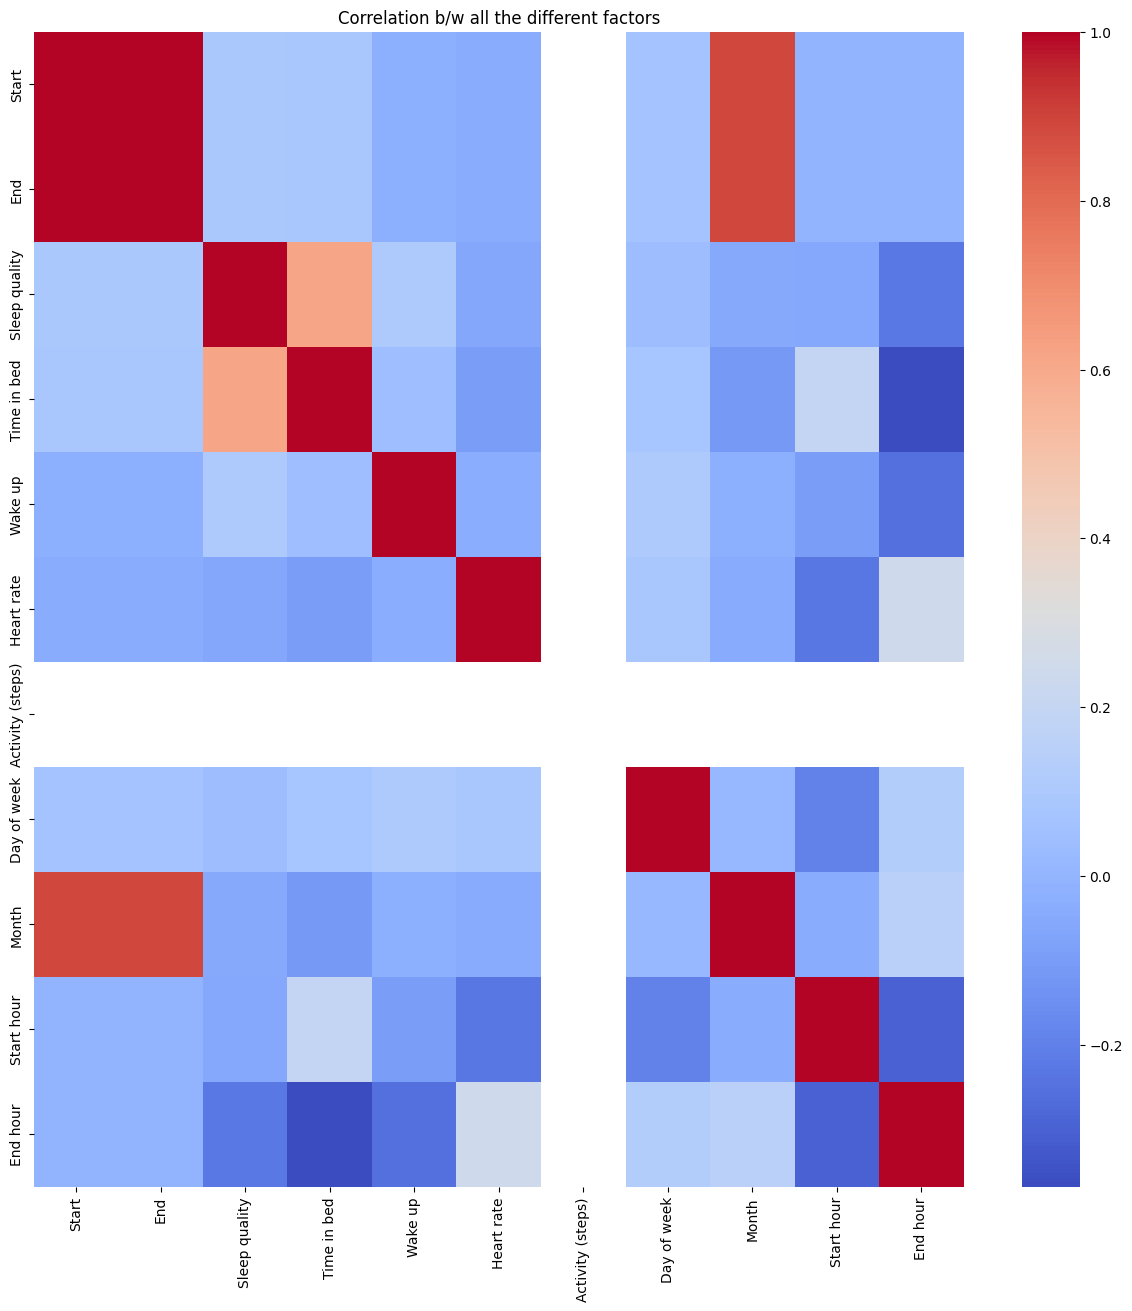

In [57]:
fig = plt.figure(figsize = (15,15))
out = sns.heatmap(df_new.corr(),cmap='coolwarm')
out.set_title('Correlation b/w all the different factors')

#### 2.2 Ploting pairplot b/w all the factors

Pairplot will give us a better idea about the distribution of all the factors affecting the quality sleep

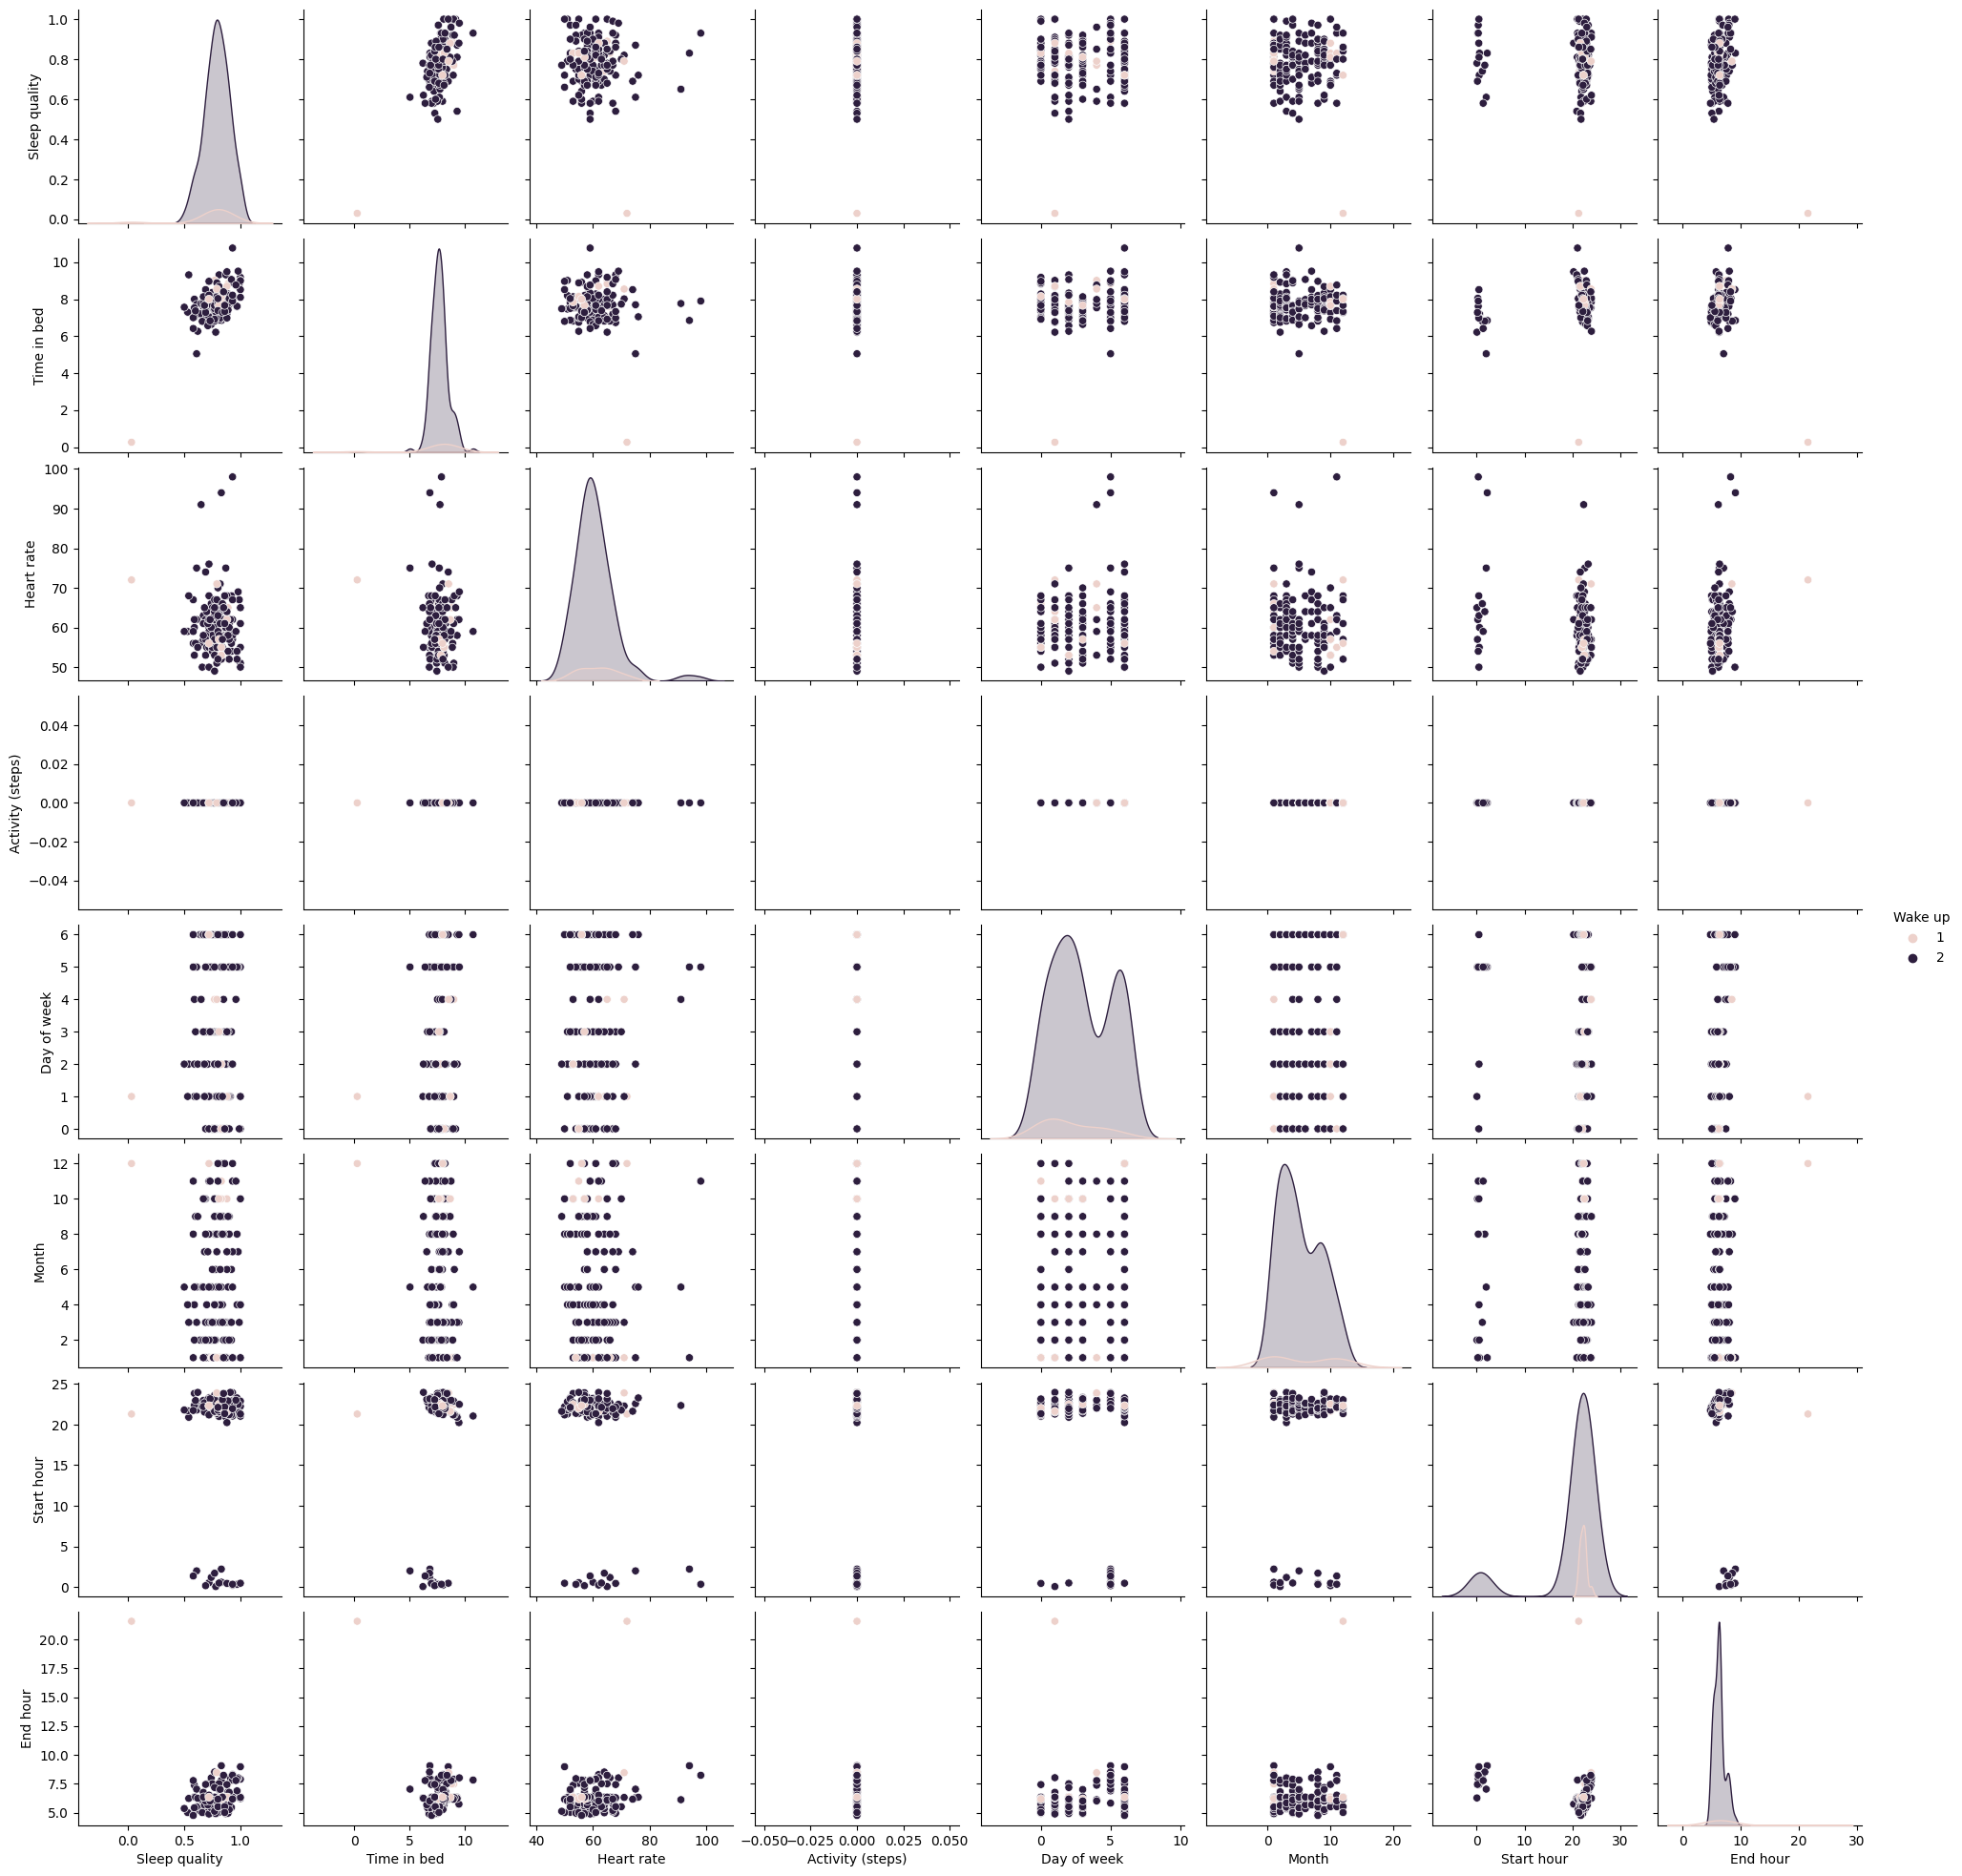

In [58]:
sns.pairplot(df_new, hue='Wake up')

#### 2.3 Ploting scatterplot b/w Time in bed and sleep quality

The scatterplot will give us a better visual estimation b/w the relationship of time in bed and sleep quality

<AxesSubplot: xlabel='Time in bed', ylabel='Sleep quality'>

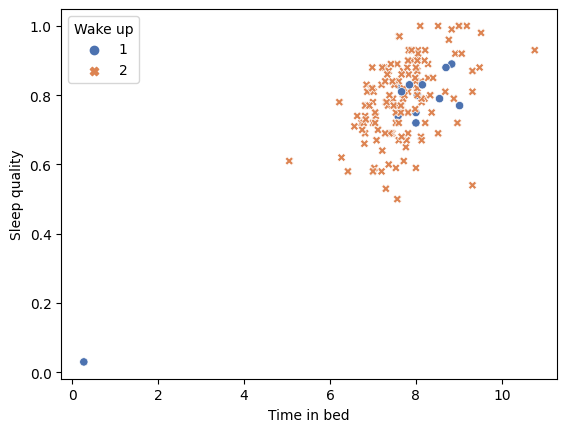

In [59]:
sns.scatterplot(data=df_new, x='Time in bed', y='Sleep quality', hue='Wake up', style='Wake up', palette="deep")


#### 2.4 Ploting scatterplot b/w Start hour and sleep quality

The scatterplot will give us a better visual estimation b/w the relationship of Start hour and sleep quality

<AxesSubplot: xlabel='Start hour', ylabel='Sleep quality'>

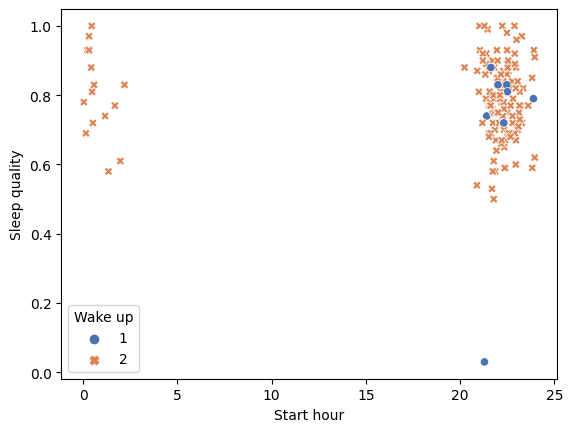

In [60]:
sns.scatterplot(data=df_new, x='Start hour', y='Sleep quality', hue='Wake up', style='Wake up', palette="deep")

#### 2.5 Ploting scatterplot b/w End hour and sleep quality

The scatterplot will give us a better visual estimation b/w the relationship of End hour and sleep quality

<AxesSubplot: xlabel='End hour', ylabel='Sleep quality'>

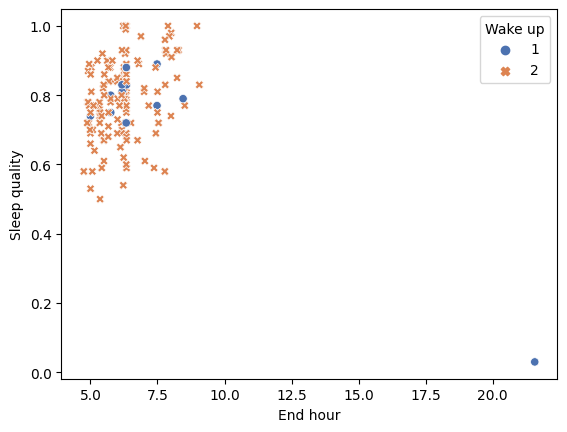

In [61]:
sns.scatterplot(data=df_new, x='End hour', y='Sleep quality', hue='Wake up', style='Wake up', palette="deep")

#### 2.6 Ploting scatterplot b/w Heart rate and sleep quality

The scatterplot will give us a better visual estimation b/w the relationship of Heart rate and sleep quality

<AxesSubplot: xlabel='Heart rate', ylabel='Sleep quality'>

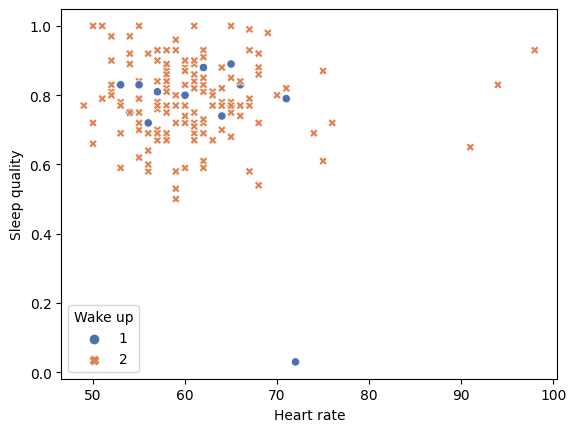

In [62]:
sns.scatterplot(data=df_new, x='Heart rate', y='Sleep quality', hue='Wake up', style='Wake up', palette="deep")

#### 2.6 Ploting scatterplot b/w Activity and sleep quality

The scatterplot will give us a better visual estimation b/w the relationship of Activity and sleep quality

<AxesSubplot: xlabel='Activity (steps)', ylabel='Sleep quality'>

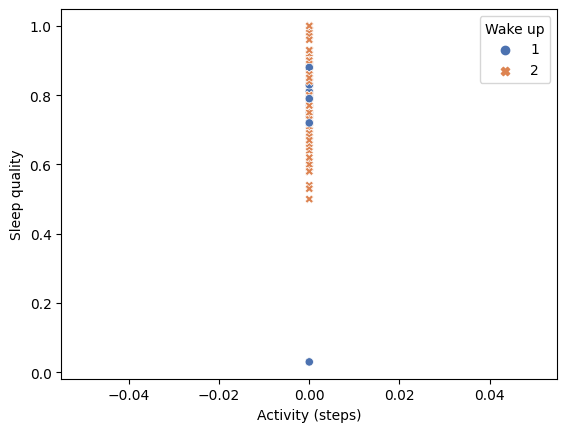

In [63]:
sns.scatterplot(data=df_new, x='Activity (steps)', y='Sleep quality', hue='Wake up', style='Wake up', palette="deep")

#### 2.7 Making a jointplot between "Time in bed" and "Sleep quality"

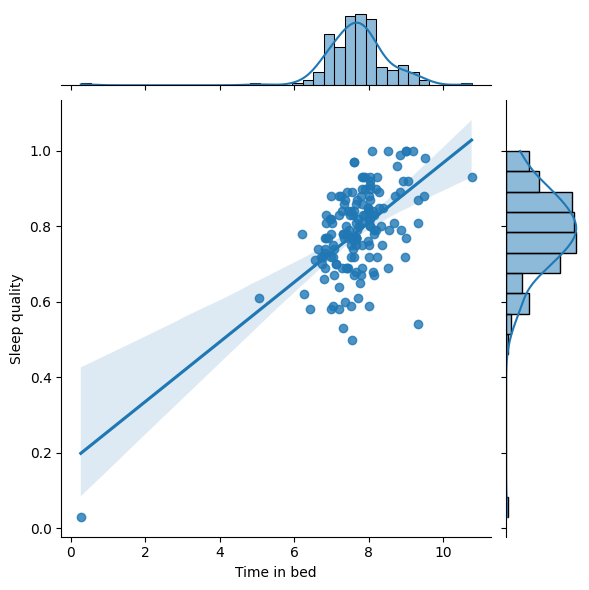

In [79]:
sns.jointplot(x=df['Time in bed'], y=df['Sleep quality'], data = df, kind='reg')

#### 2.8 Making a jointplot between "Start hour" and "Sleep quality"

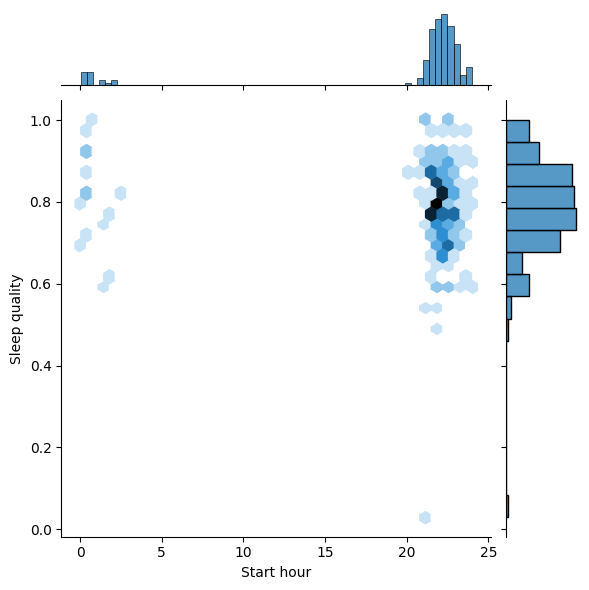

In [80]:
sns.jointplot(x=df['Start hour'], y=df['Sleep quality'], data = df, kind='hex')

#### 2.9 Making a jointplot between "End hour" and "Sleep quality"

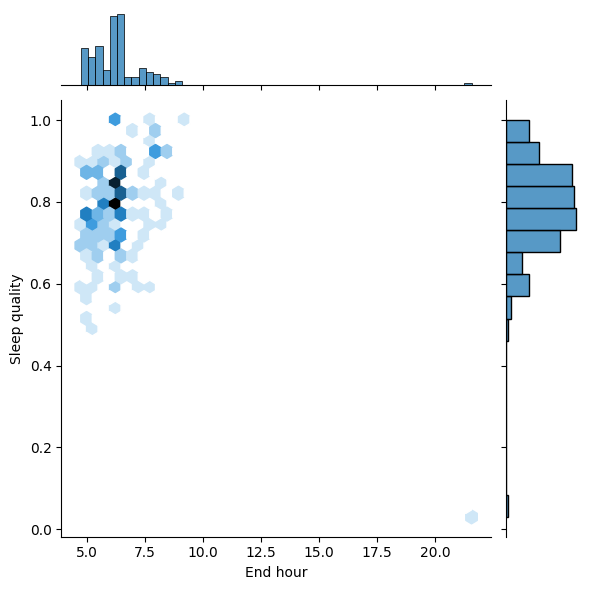

In [81]:
sns.jointplot(x=df['End hour'], y=df['Sleep quality'], data = df, kind='hex')

## 3 Predictive modelling on sleep quality

#### 3.1 We split the entire dataset into Training and Testing dataset

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sleep quality', 'Start', 'End', 'Sleep Notes'])
y = df['Sleep quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Normalize the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 3.2 Using LinearRegression Model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

#### 3.3 Using RandomForest Model

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

#### 3.4 Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert 'y' into binary categories 
y_bin = y.apply(lambda x: 1 if x > 0.5 else 0)  # We assume > 50% is 'Good'

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

#### 3.5 Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

### Model performance comparison 

In [78]:
print("Model Performance:")
print("-" * 30)
print(f"Linear Regression:\nMSE: {mse_lr}\nR2 Score: {r2_lr}\n")
print(f"Random Forest:\nMSE: {mse_rf}\nR2 Score: {r2_rf}\n")
print(f"Logistic Regression (Accuracy): {accuracy_logreg}\n")
print(f"Decision Tree:\nMSE: {mse_dt}\nR2 Score: {r2_dt}\n")

Model Performance:
------------------------------
Linear Regression:
MSE: 0.008079146530438598
R2 Score: 0.38151737252445606

Random Forest:
MSE: 0.009629738709677415
R2 Score: 0.2628149425653611

Logistic Regression (Accuracy): 1.0

Decision Tree:
MSE: 0.0
R2 Score: 1.0



## From all the above Analysis and Visualization we can cleary conclude that, A Person Who Sleeps Better(i.e, in between 6 to 8 hours) and has possitive self affirmations (which may also include drinking coffee) will have a higher sleep quality. Additionally the notion of "Early to bed, early to rise; makes you wealthy and wise" turns to be true as the best sleep quality if for those who slept between 9PM and 5AM